In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

In [2]:
import time
import random
np.random.seed(0) 
random.seed(0)

# Problem description
section 4.1 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [3]:
ms = [5, 5, 12, 10, 6]
ns = [5, 12, 10, 6, 9]
# ms = [20, 30, 40, 25, 35]
# ns = [30, 40, 25, 35, 20]
params = ob.sc_params(ms, ns)

# Distributed solution

In [4]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [ ]:
ob.add_extra_methods_to_problem(prob)

In [5]:
best_val = np.inf
max_iter = 60

for tau_k in [1, 5, 10]:
    for m_l in [0.2, 0.5, 0.7]:
        for m_f in [0.1, 0.5, 0.7]:
            for mu_max in [1, 5, 10]:
                ds_params = (tau_k, m_l, m_f, mu_max)
                x_agent, x_global = prob.solve_doubly_stabilized(ds_params=ds_params, rel_gap=10**(-5), abs_gap=10**(-5),\
                                                                  max_iter=max_iter, memory=max_iter, tol=1e-6, printing=False)
                if prob.upper_bnd[-1] - prob.lower_bnd[-1] < best_val:
                    best_val = prob.upper_bnd[-1] - prob.lower_bnd[-1] 
                    best_params = ds_params
                rel_gap = prob.get_rel_gap(U=prob.upper_bnd[-1], L=prob.lower_bnd[-1])
                print(f"{ds_params=}, {rel_gap=}, {prob.upper_bnd[-1]=}, {prob.lower_bnd[-1]=}")

print(f"{best_params=}")

ds_params=(1, 0.2, 0.1, 1), rel_gap=inf, prob.upper_bnd[-1]=0.15781364638268514, prob.lower_bnd[-1]=-2.0749246161070545
ds_params=(1, 0.2, 0.1, 5), rel_gap=0.5267376856199014, prob.upper_bnd[-1]=-0.69412964778508, prob.lower_bnd[-1]=-1.0597538919795504
ds_params=(1, 0.2, 0.1, 10), rel_gap=0.4344522742187956, prob.upper_bnd[-1]=-0.709384436958671, prob.lower_bnd[-1]=-1.0175781188907855
ds_params=(1, 0.2, 0.5, 1), rel_gap=inf, prob.upper_bnd[-1]=6.675870817097849, prob.lower_bnd[-1]=-6.89975645322297
ds_params=(1, 0.2, 0.5, 5), rel_gap=inf, prob.upper_bnd[-1]=1.0308778285465365, prob.lower_bnd[-1]=-3.2734604214436196
ds_params=(1, 0.2, 0.5, 10), rel_gap=inf, prob.upper_bnd[-1]=1.3607657180663786, prob.lower_bnd[-1]=-3.0011435387576384
ds_params=(1, 0.2, 0.7, 1), rel_gap=inf, prob.upper_bnd[-1]=9.943492254429437, prob.lower_bnd[-1]=-8.490716333802936
ds_params=(1, 0.2, 0.7, 5), rel_gap=inf, prob.upper_bnd[-1]=1.773571068709419, prob.lower_bnd[-1]=-3.669975028358948
ds_params=(1, 0.2, 0.7,

/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ds_params=(5, 0.5, 0.5, 10), rel_gap=4.617350644402238, prob.upper_bnd[-1]=-0.2660795091001553, prob.lower_bnd[-1]=-1.4946619019059888
ds_params=(5, 0.5, 0.7, 1), rel_gap=inf, prob.upper_bnd[-1]=3.794443693386043, prob.lower_bnd[-1]=-4.939618439235197
ds_params=(5, 0.5, 0.7, 5), rel_gap=inf, prob.upper_bnd[-1]=0.5095339590910584, prob.lower_bnd[-1]=-2.201668282921318
ds_params=(5, 0.5, 0.7, 10), rel_gap=inf, prob.upper_bnd[-1]=0.9961030405200777, prob.lower_bnd[-1]=-2.733017156573446
ds_params=(5, 0.7, 0.1, 1), rel_gap=6.260529725483097, prob.upper_bnd[-1]=-0.21228261369233437, prob.lower_bnd[-1]=-1.5412842269164386
ds_params=(5, 0.7, 0.1, 5), rel_gap=0.765870536727783, prob.upper_bnd[-1]=-0.6224598067791076, prob.lower_bnd[-1]=-1.0991834330884949
ds_params=(5, 0.7, 0.1, 10), rel_gap=0.49476115572797785, prob.upper_bnd[-1]=-0.6951902824548872, prob.lower_bnd[-1]=-1.0391434300531266
ds_params=(5, 0.7, 0.5, 1), rel_gap=inf, prob.upper_bnd[-1]=1.3579285761105275, prob.lower_bnd[-1]=-3.492

In [7]:
best_params

(1, 0.7, 0.1, 1)

In [6]:
max_iter = 150
start_time = time.time()
x_agent, x_global = prob.solve_doubly_stabilized(ds_params=best_params, rel_gap=10**(-5), abs_gap=10**(-5),\
                                                  max_iter=max_iter, memory=max_iter, tol=1e-6, print_freq=20)
print(f"elapsed time = {time.time() - start_time}")

k=0, rel_gap=inf, L=-67.12188300797834, U=276.8879195054916, L0=-67.12188300797834
   null step: tau_k=0.5000005, mu_k=1.0000000000040488, L_k=-67.12188300797834, l_k=173.68497875145061
k=20, rel_gap=inf, L=-6.53739798443555, U=3.264619783706344, L0=-6.53739798443555
   descent step: tau_k=0.005021344196929874, mu_k=1.0000000000016442, L_k=-67.12188300797834, l_k=-0.8999911287265077
k=40, rel_gap=5.845686342950134, L=-1.6387341662181836, U=-0.23938201140427573, L0=-1.6387341662181836
   descent step: tau_k=0.010985155835934996, mu_k=1.0000000000351141, L_k=-67.12188300797834, l_k=-0.7293443206410881
k=60, rel_gap=0.3207945156094128, L=-0.9719631470691468, U=-0.7358927793705172, L0=-0.9719631470691468
   descent step: tau_k=0.012622093147229103, mu_k=1.3188661118772698, L_k=-67.12188300797834, l_k=-0.764138131473024
k=80, rel_gap=0.15870619531702176, L=-0.9185125767642255, U=-0.792705329855357, L0=-0.9185125767642255
   descent step: tau_k=2.6149032726094455e-05, mu_k=1.00000064355149, 

In [8]:
prob.lower_bnd[-1], prob.upper_bnd[-1]

(-0.889325748082392, -0.8112605548420371)

# Centralized solution

In [9]:
h_cvx, x_cvx, prob_cvx = ob.cvx_supply_chain(params=params)

In [10]:
h_cvx, prob.upper_bnd[-1]

(-0.8325469349499457, -0.8112605548420371)

In [11]:
assert prob.lower_bnd[-1] - 1e-8 <= h_cvx <= 1e-8 + prob.upper_bnd[-1], print(prob.lower_bnd[-1], h_cvx, prob.upper_bnd[-1])

# Plot

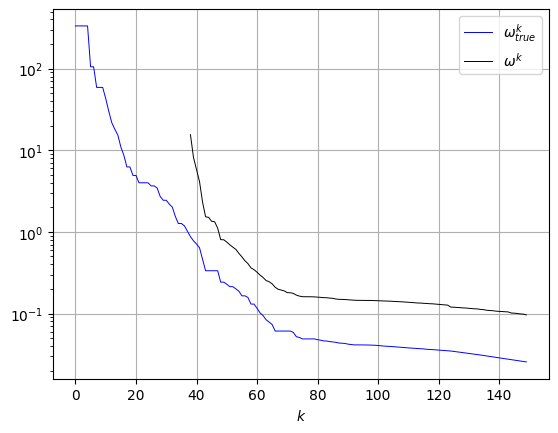

In [12]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)